## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
taxi_data = pd.read_csv("/content/drive/My Drive/project5/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [ ]:
# ваш код здесь
taxi_data["pickup_datetime"] = pd.to_datetime(taxi_data["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

taxi_data["dropoff_datetime"] = pd.to_datetime(taxi_data["dropoff_datetime"], format="%Y-%m-%d %H:%M:%S")
print('от', min(taxi_data["pickup_datetime"]))
print('до', max(taxi_data["pickup_datetime"]))

от 2016-01-01 00:00:17
до 2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [ ]:
# ваш код здесь
#Получим долю пропусков в каждом столбце.
cols_null = taxi_data.isnull().sum()
cols_null

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [ ]:
# ваш код здесь
print(taxi_data['vendor_id'].nunique())
print(taxi_data['trip_duration'].median())
taxi_data.describe()

2
662.0


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [ ]:
# ваш код здесь
def add_datetime_features(taxi_data):
  taxi_data["pickup_date"] = taxi_data["pickup_datetime"].dt.date
  taxi_data["pickup_hour"] = taxi_data["pickup_datetime"].dt.hour
  taxi_data["pickup_day_of_week"] = taxi_data["pickup_datetime"].dt.day_of_week
  return taxi_data

taxi_data = add_datetime_features(taxi_data)
print('Сколько поездок было совершено в субботу?', taxi_data['pickup_day_of_week'].value_counts()[5])
print('Сколько поездок в среднем совершается в день?', taxi_data['pickup_date'].value_counts().sum()/taxi_data['pickup_date'].nunique())

Сколько поездок было совершено в субботу? 220868
Сколько поездок в среднем совершается в день? 8014.527472527472


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
holiday_data = pd.read_csv('/content/drive/My Drive/project5/holiday_data.csv', sep=';')
# ваш код здесь
holiday_data["date"] = pd.to_datetime(holiday_data["date"], format="%Y-%m-%d %H:%M:%S").dt.date
#def add_holiday_features(arg):
 # if arg in holiday_data['date'].values:
  #  return 1
  #else:
   # return 0
#taxi_data['pickup_holiday'] = taxi_data['pickup_date'].apply(add_holiday_features)

def add_holiday_features(taxi_data, holiday_data):
  taxi_data['pickup_holiday'] = 0
  for i in range(taxi_data.shape[0]):
    arg = taxi_data['pickup_date'].iloc[i]
    holiday_values = holiday_data['date'].values
    if arg in holiday_values:
      taxi_data['pickup_holiday'].iloc[i] = 1
 #   else:
  #    taxi_data['pickup_holiday'].iloc[i] = 0
  return taxi_data

taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data.loc[taxi_data['pickup_holiday']==1]['trip_duration'].median()

<ipython-input-9-530a996c72ac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['pickup_holiday'].iloc[i] = 1


585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [ ]:
osrm_data = pd.read_csv('/content/drive/My Drive/project5/osrm_data_train.csv')
# ваш код здесь
def add_osrm_features(taxi_data, osrm_data):
  return taxi_data.merge(osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], on='id', how='left')

taxi_data = add_osrm_features(taxi_data, osrm_data)

print('разница', taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())
print('пропуски после объединения таблиц', taxi_data.isnull().sum())

разница 372.5
пропуски после объединения таблиц id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64


In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [ ]:
# ваш код здесь
def add_geographical_features(taxi_data):
  lat1 = taxi_data['pickup_latitude']
  lng1 = taxi_data['pickup_longitude']
  lat2 = taxi_data['dropoff_latitude']
  lng2 = taxi_data['dropoff_longitude']
  taxi_data['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
  taxi_data['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
  return taxi_data

taxi_data = add_geographical_features(taxi_data)
print('медианное расстояние Хаверсина', round(taxi_data['haversine_distance'].median(), 2))

медианное расстояние Хаверсина 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=15, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(taxi_data, kmeans):
  taxi_data['geo_cluster'] = kmeans.labels_
  return taxi_data

taxi_data = add_cluster_features(taxi_data, kmeans)
print('Сколько поездок содержится в наименьшем по размеру географическом кластере', taxi_data['geo_cluster'].value_counts().min())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Сколько поездок содержится в наименьшем по размеру географическом кластере 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [ ]:
weather_data = pd.read_csv('/content/drive/My Drive/project5/weather_data.csv')
weather_data = weather_data[['temperature', 'visibility', 'wind speed', 'precip', 'events', 'time']].copy()
# ваш код здесь
def add_weather_features(taxi_data, weather_data):
  weather_data["time_datetime"] = pd.to_datetime(weather_data["time"], format="%Y-%m-%d %H:%M:%S")
  weather_data["date"] = weather_data["time_datetime"].dt.date
  weather_data["hour"] = weather_data["time_datetime"].dt.hour
  #weather_data.drop(['time_datetime', 'time'], axis=1, inplace=True)
  taxi_data = taxi_data.merge(weather_data, how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])
  taxi_data.drop(['date', 'hour', 'time_datetime', 'time'], axis=1, inplace=True)
  return taxi_data

taxi_data = add_weather_features(taxi_data, weather_data)
print('Сколько поездок было совершено в снежную погоду', taxi_data['events'].value_counts()['Snow'])

print('Процент пропусков в столбцах с погодными условиями', taxi_data[['temperature', 'visibility', 'wind speed', 'precip']].isnull().sum().max() / len(taxi_data) * 100)

Сколько поездок было совершено в снежную погоду 13126
Процент пропусков в столбцах с погодными условиями 0.8248757064780714


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [ ]:
# ваш код здесь
def fill_null_weather_data(taxi_data):
  for col in ['temperature', 'visibility', 'wind speed', 'precip']:
    taxi_data[col] = taxi_data[col].fillna(taxi_data.groupby('pickup_date')[col].transform('median'))
  taxi_data['events'].fillna('None', inplace=True)
  for  col in ['total_distance', 'total_travel_time', 'number_of_steps']:
    taxi_data[col].fillna(taxi_data[col].median(), inplace=True)
  return taxi_data

taxi_data = fill_null_weather_data(taxi_data)
print('медиана в столбце temperature после заполнения пропусков', taxi_data['temperature'].median())

медиана в столбце temperature после заполнения пропусков 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


In [ ]:
#убираем выбросы, значения trip_duration, которые меньше total_travel_time (наименьшей времени поездки)
taxi_data = taxi_data.loc[taxi_data['total_travel_time']<taxi_data['trip_duration']]

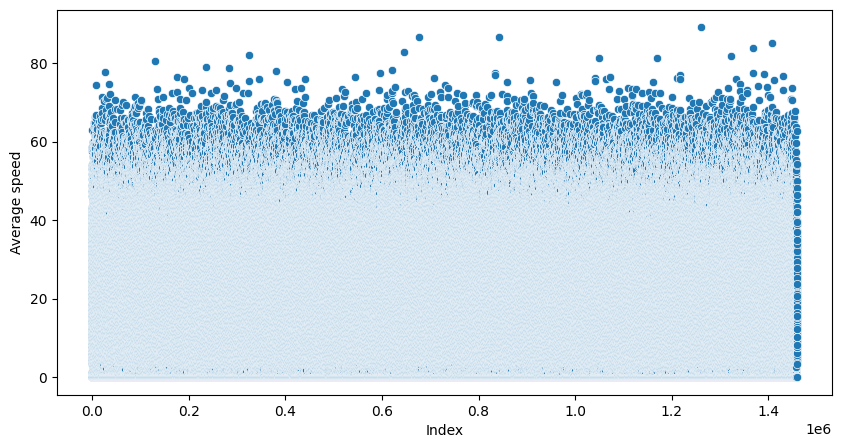

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

Число выбросов по методу z-отклонения: 8906
Результирующее число записей: 1408692


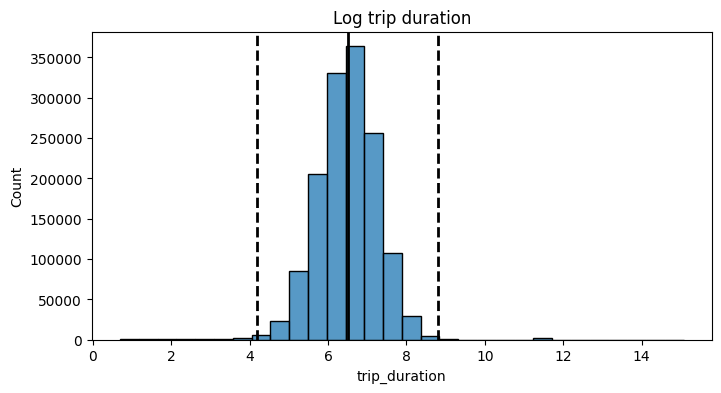

In [ ]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(taxi_data, 'trip_duration', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_trip_duration = np.log(taxi_data['trip_duration'] + 1)
histplot = sns.histplot(log_trip_duration, bins=30, ax=ax)
histplot.axvline(log_trip_duration.mean(), color='k', lw=2)
histplot.axvline(log_trip_duration.mean()+ 3 * log_trip_duration.std(), color='k', ls='--', lw=2)
histplot.axvline(log_trip_duration.mean()- 3 * log_trip_duration.std(), color='k', ls='--', lw=2)
histplot.set_title('Log trip duration');

Число выбросов по методу z-отклонения: 7115
Результирующее число записей: 1401577


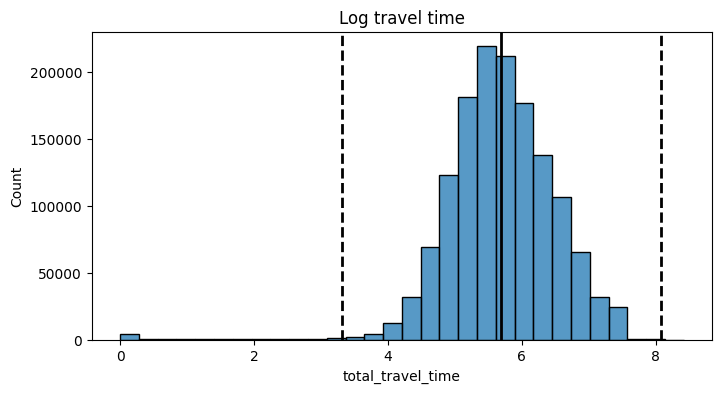

In [ ]:
#выбросы по признаку total_travel_time, базовое время поездки. убираем нулевые значения
taxi_data = cleaned
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(taxi_data, 'total_travel_time', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_travel_time = np.log(taxi_data['total_travel_time'] + 1)
histplot = sns.histplot(log_travel_time, bins=30, ax=ax)
histplot.axvline(log_travel_time.mean(), color='k', lw=2)
histplot.axvline(log_travel_time.mean()+ 3 * log_travel_time.std(), color='k', ls='--', lw=2)
histplot.axvline(log_travel_time.mean()- 3 * log_travel_time.std(), color='k', ls='--', lw=2)
histplot.set_title('Log travel time');

<ipython-input-20-e07abca61efd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['avg_speed'] = avg_speed


Число выбросов по методу z-отклонения: 6457
Результирующее число записей: 1395120


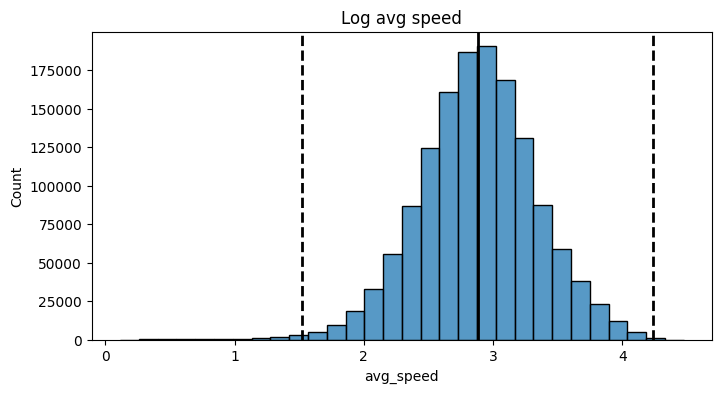

In [ ]:
#выбросы по средней скорости поездки
taxi_data = cleaned
taxi_data['avg_speed'] = avg_speed
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(taxi_data, 'avg_speed', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_avg_speed = np.log(taxi_data['avg_speed'] + 1)
histplot = sns.histplot(log_avg_speed, bins=30, ax=ax)
histplot.axvline(log_avg_speed.mean(), color='k', lw=2)
histplot.axvline(log_avg_speed.mean()+ 3 * log_avg_speed.std(), color='k', ls='--', lw=2)
histplot.axvline(log_avg_speed.mean()- 3 * log_avg_speed.std(), color='k', ls='--', lw=2)
histplot.set_title('Log avg speed');

In [ ]:
# ваш код здесь
taxi_data = cleaned

print('Сколько выбросов по признаку длительности поездки', taxi_data.loc[(taxi_data['trip_duration'] / 3600)>24].shape[0])
taxi_data = taxi_data.loc[(taxi_data['trip_duration'] / 3600)<=24]
#taxi_data['avg_speed'] = avg_speed
print('Сколько выбросов по признаку скорости', taxi_data.loc[taxi_data['avg_speed']>300].shape[0])
taxi_data = taxi_data.loc[taxi_data['avg_speed']<=300]

Сколько выбросов по признаку длительности поездки 0
Сколько выбросов по признаку скорости 0


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)
taxi_data['total_travel_time_log'] = np.log(taxi_data['total_travel_time']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

0.0
Данные не распределены нормально (мы отвергаем H0)


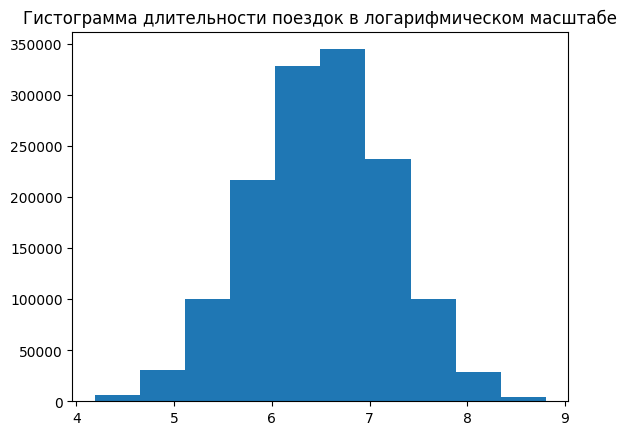

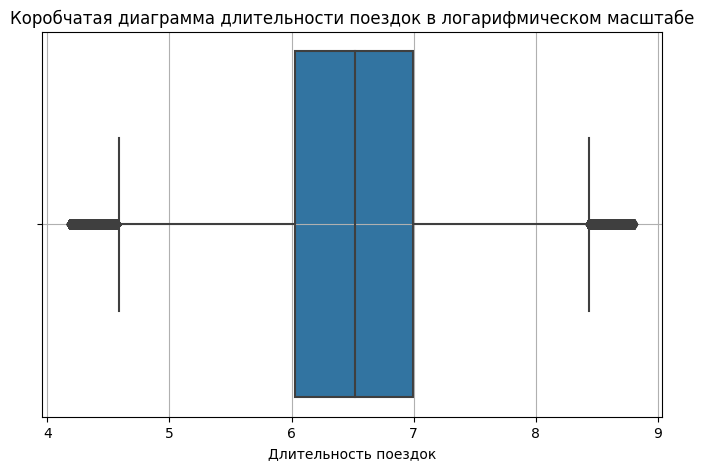

In [ ]:
# ваш код здесь
#Тест Д’Агостино
from scipy.stats import normaltest
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05
_, p = normaltest(taxi_data['trip_duration_log'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print(p)

# Интерпретация

if p > alpha/2:
	print(H0)
else:
	print(Ha)

#Гистограмма
plt.hist(taxi_data['trip_duration_log'])
plt.title('Гистограмма длительности поездок в логарифмическом масштабе')
plt.show()

#Коробчатая диаграмма
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=taxi_data,
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Коробчатая диаграмма длительности поездок в логарифмическом масштабе');
boxplot.set_xlabel('Длительность поездок');
boxplot.grid()


*Вывод: По гистограмме распределение длительности поездок в логарифмическом масштабе похож на нормальное, но тест Д’Агостино говорит нам обратное. По коробчатой диаграмме видим что есть много выбросов.*

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

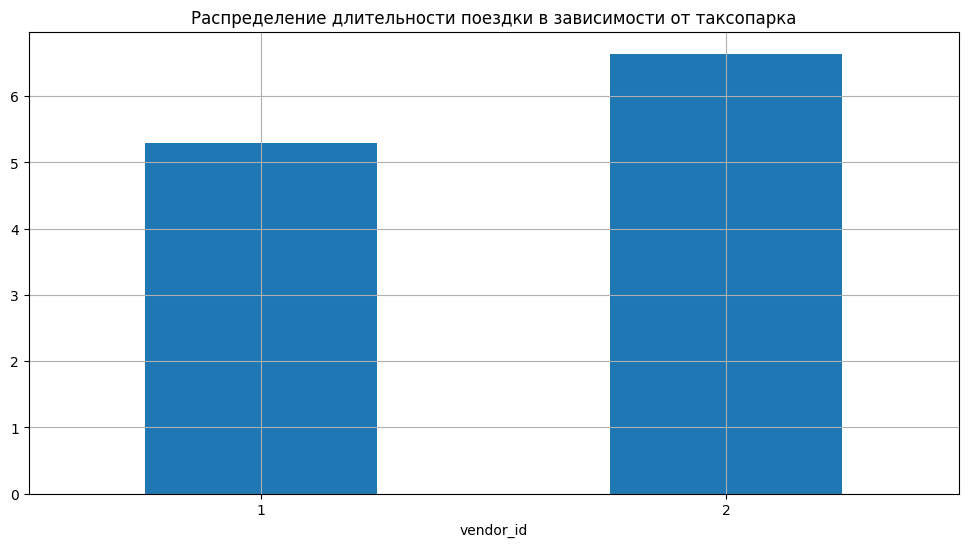

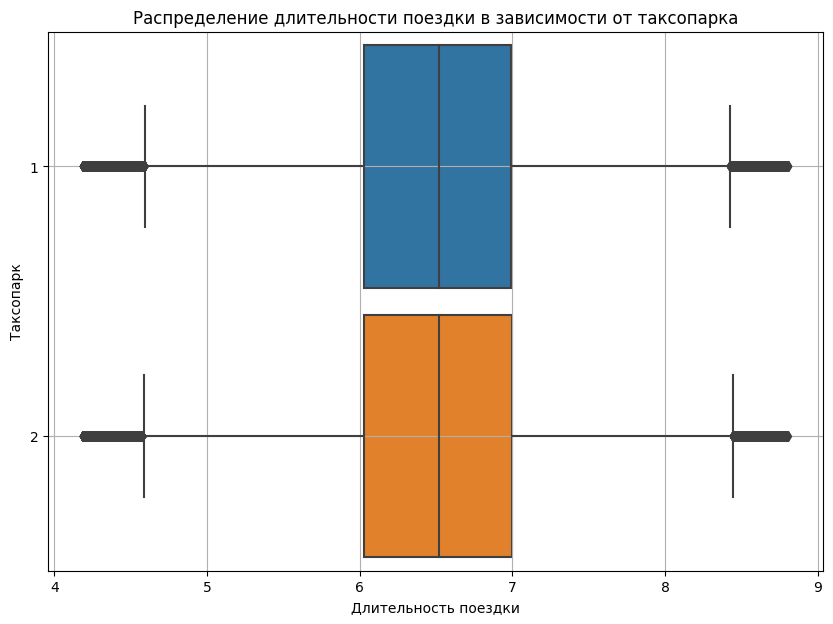

In [ ]:
# ваш код здесь
grouped_vendor = taxi_data.groupby(['vendor_id'])['trip_duration_log'].last()
grouped_vendor.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    title='Распределение длительности поездки в зависимости от таксопарка',
    rot=0
);

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=taxi_data,
    y='vendor_id',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение длительности поездки в зависимости от таксопарка');
boxplot.set_xlabel('Длительность поездки');
boxplot.set_ylabel('Таксопарк');
boxplot.grid()

*Вывод: Распределения длительности поездки в группах по таксопаркам практически не отличаются.*

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

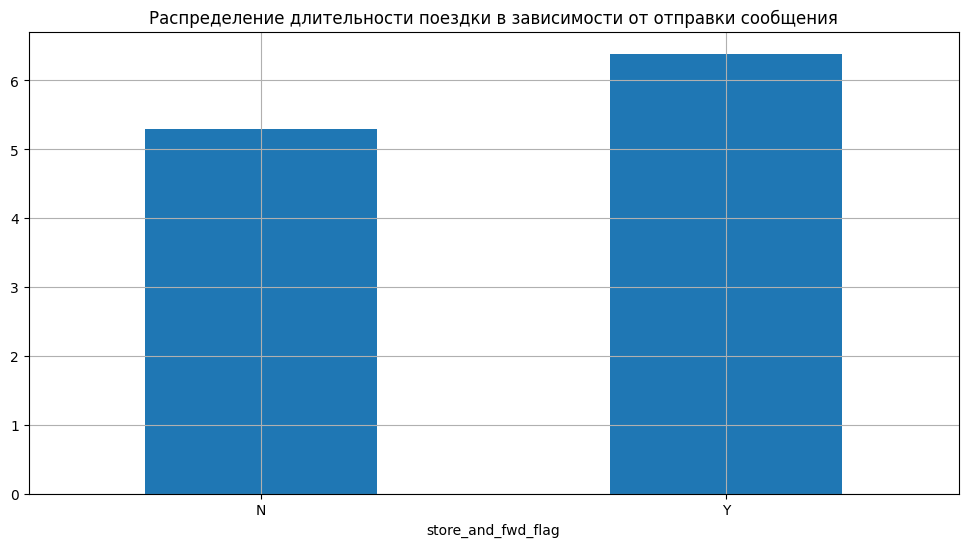

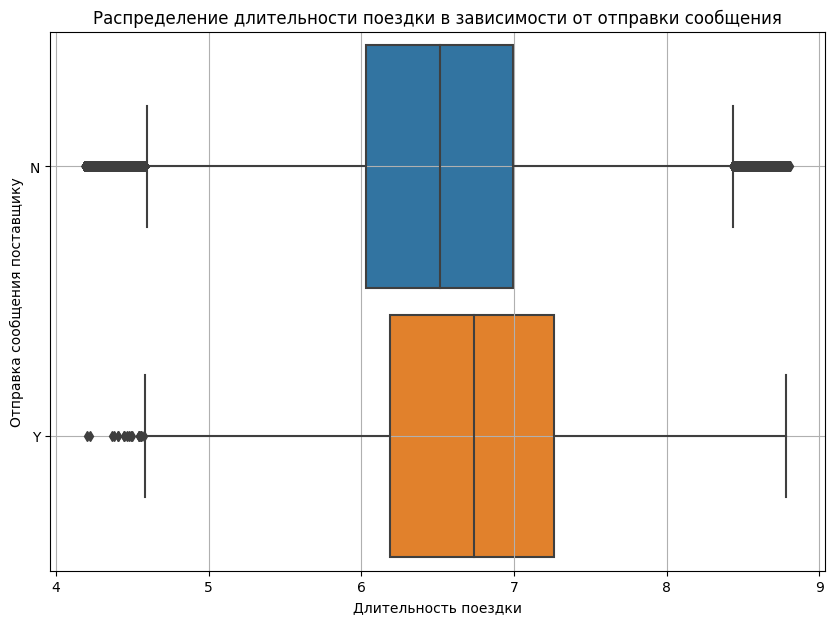

In [ ]:
# ваш код здесь
grouped_store = taxi_data.groupby(['store_and_fwd_flag'])['trip_duration_log'].last()
grouped_store.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    title='Распределение длительности поездки в зависимости от отправки сообщения',
    rot=0
);

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=taxi_data,
    y='store_and_fwd_flag',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение длительности поездки в зависимости от отправки сообщения');
boxplot.set_xlabel('Длительность поездки');
boxplot.set_ylabel('Отправка сообщения поставщику');
boxplot.grid()

В*ывод: Отправка сообщения имеет некоторое влияние на длительность поездки. Она немного больше при отправке сообщения. Хотя имеется больше выбросов при не отправлении сообщении*

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

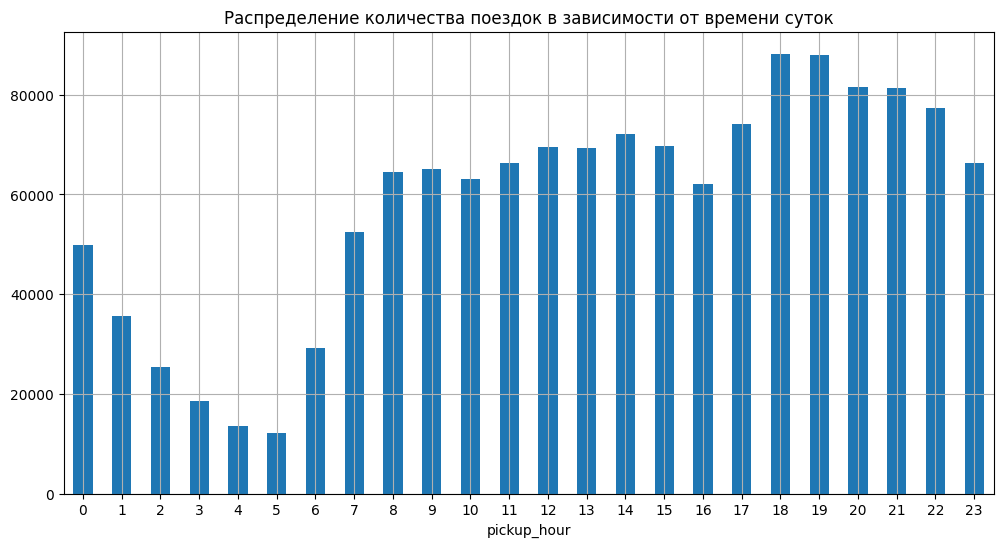

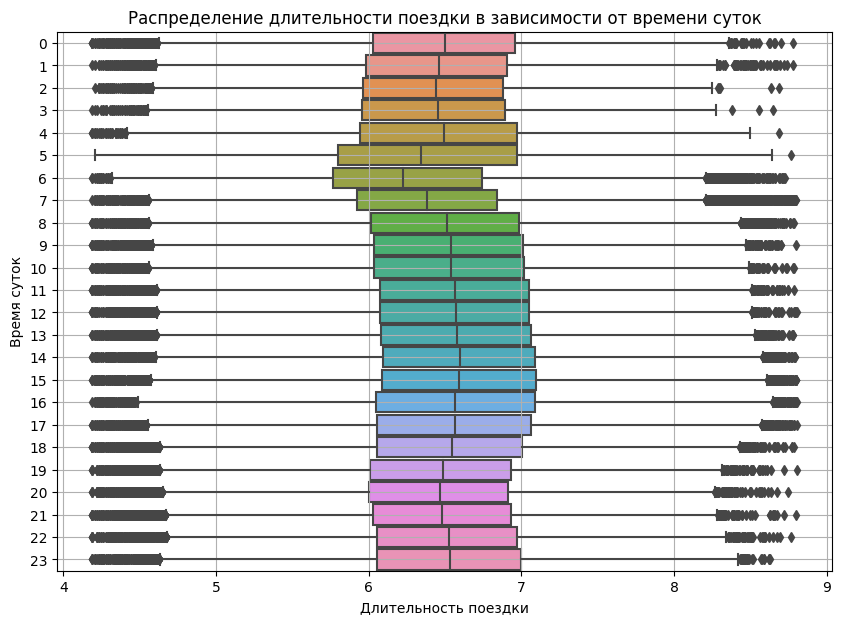

In [ ]:
# ваш код здесь
grouped_count_hour = taxi_data.groupby(['pickup_hour'])['trip_duration_log'].count()
grouped_count_hour.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    title='Распределение количества поездок в зависимости от времени суток',
    rot=0
);

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=taxi_data,
    y='pickup_hour',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение длительности поездки в зависимости от времени суток');
boxplot.set_xlabel('Длительность поездки');
boxplot.set_ylabel('Время суток');
boxplot.grid()

*Вывод: Количество поездок зависит от времени суток. Минимум от 0 до 7, а максимум от 17 до 23 часов. Длительность поездок зависит от времени суток. Минимум от 4 до 8, а максимум от 13 до 18 часов.*

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


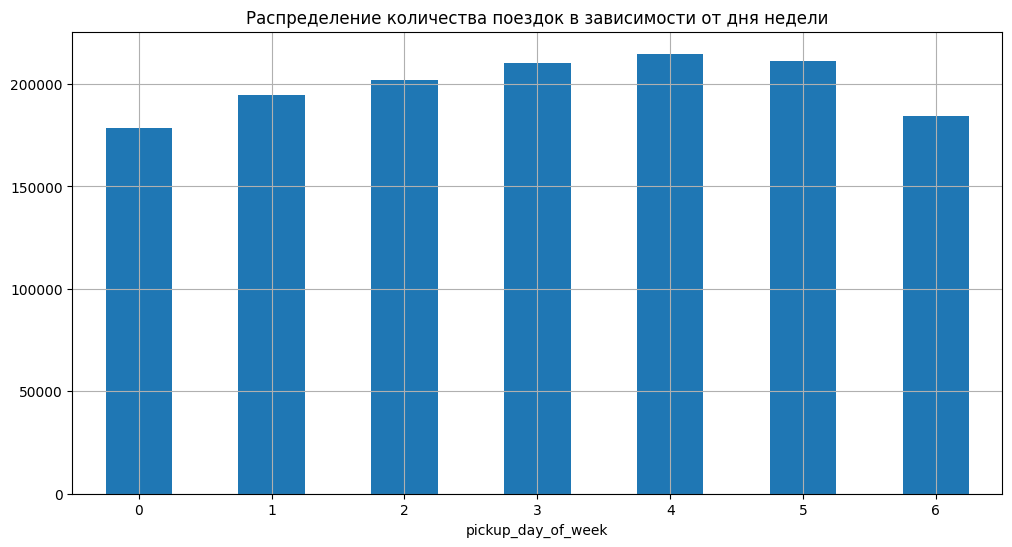

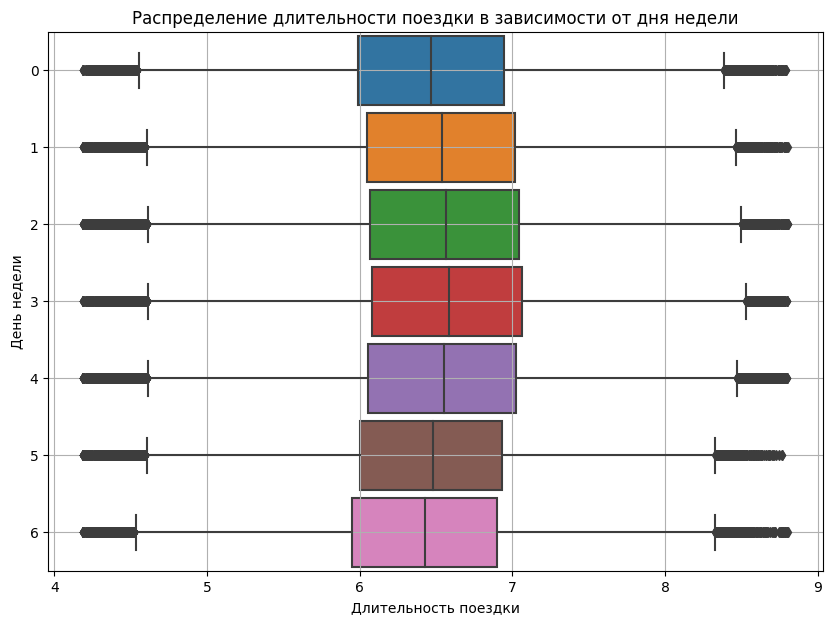

In [ ]:
# ваш код здесь
grouped_count_hour = taxi_data.groupby(['pickup_day_of_week'])['trip_duration_log'].count()
grouped_count_hour.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    title='Распределение количества поездок в зависимости от дня недели',
    rot=0
);

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=taxi_data,
    y='pickup_day_of_week',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение длительности поездки в зависимости от дня недели');
boxplot.set_xlabel('Длительность поездки');
boxplot.set_ylabel('День недели');
boxplot.grid()

*Вывод: Количество поездок зависит от дня недели. Минимум в понедельник, а максимум в пятницу. Длительность поездок зависит от дня недели. Минимум в воскресенье, а максимум четверг.*

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

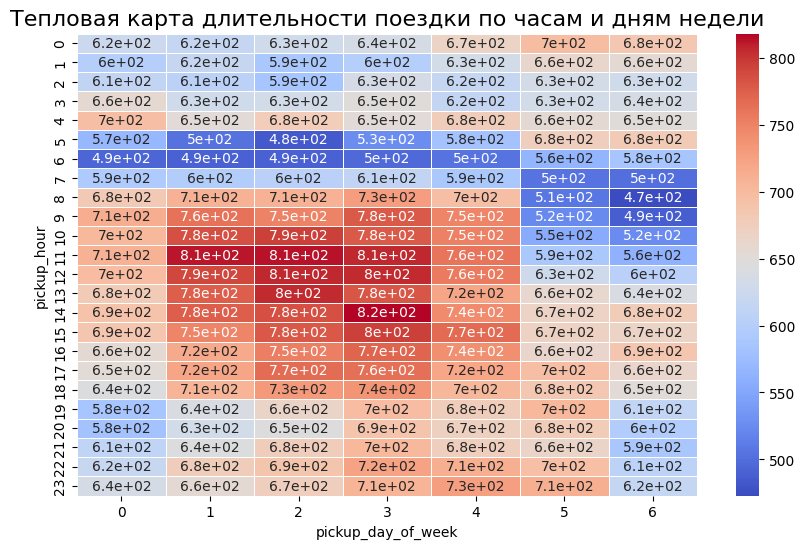

In [ ]:
# ваш код здесь
df = pd.pivot_table(taxi_data, index=['pickup_hour'], columns=['pickup_day_of_week'], values='trip_duration', aggfunc=np.median)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(df, linewidths=.5, annot=True, cmap='coolwarm')
heatmap.set_title('Тепловая карта длительности поездки по часам и дням недели', fontsize=16);

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395120 entries, 0 to 1458643
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1395120 non-null  object        
 1   vendor_id              1395120 non-null  int64         
 2   pickup_datetime        1395120 non-null  datetime64[ns]
 3   dropoff_datetime       1395120 non-null  datetime64[ns]
 4   passenger_count        1395120 non-null  int64         
 5   pickup_longitude       1395120 non-null  float64       
 6   pickup_latitude        1395120 non-null  float64       
 7   dropoff_longitude      1395120 non-null  float64       
 8   dropoff_latitude       1395120 non-null  float64       
 9   store_and_fwd_flag     1395120 non-null  object        
 10  trip_duration          1395120 non-null  int64         
 11  pickup_date            1395120 non-null  object        
 12  pickup_hour            13951

*Вывод: Самые продолжительные поездки наблюдаются в диапазоне от 8 до 18 часов с понедельника по пятницу. Пик наблюдается в четверг в 14 часов. Чем ближе выходные длительность поездок в вечернее время увелиичвается. А в выходные наблюдается смещение начала продолжительных поездок с 14 часов*

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


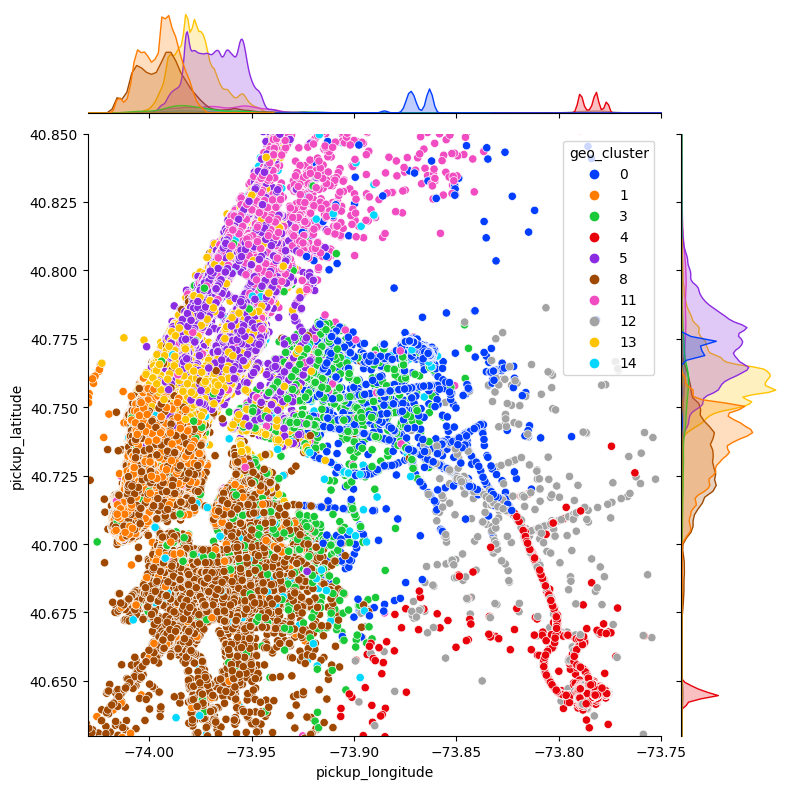

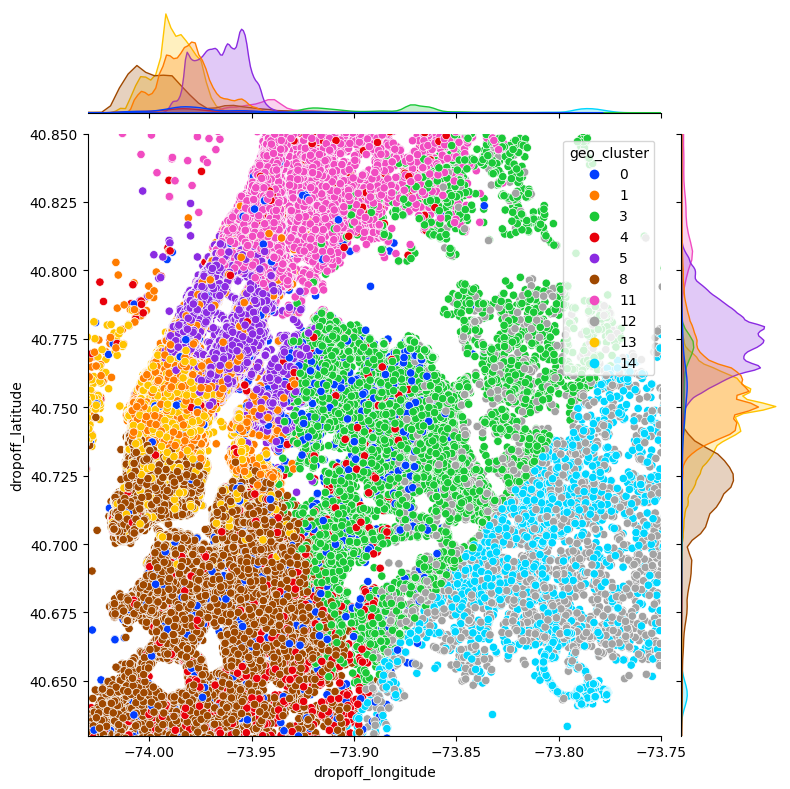

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь
jointplot1 = sns.jointplot(
    data=taxi_data,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    xlim = city_long_border,
    ylim = city_lat_border,
    #palette = 'coolwarm',
    palette='bright',
    height=8,
)

jointplot2 = sns.jointplot(
    data=taxi_data,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    xlim = city_long_border,
    ylim = city_lat_border,
    #palette = 'coolwarm',
    palette='bright',
    height=8,
)

*Вывод: В представленные ограничения города не попали 2 из 10 географических кластеров. Больше точек завершения поездок в юго-восточной части города, чем точек начала поездок.*

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1395120, 29)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log', 'total_travel_time_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,direction,geo_cluster,temperature,visibility,wind speed,precip,events,avg_speed,trip_duration_log,total_travel_time_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,99.970196,5,4.4,8.0,27.8,0.3,None,15.896176,6.122493,5.111385
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,-117.153768,8,28.9,16.1,7.4,0.0,None,13.646335,6.498282,5.808142
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,-159.680165,8,-6.7,16.1,24.1,0.0,None,18.747119,7.661527,6.644571
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,-172.737700,8,7.2,16.1,25.9,0.0,None,14.932028,6.063785,5.467216
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,179.473585,5,9.4,16.1,9.3,0.0,None,13.364690,6.077642,4.949469


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [ ]:
# ваш код здесь
drop_columns = ['id', 'dropoff_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1395120, 27)


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date'] #, 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1395120, 25)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
# ваш код здесь
def get_code(arg):
  if arg==1 or arg=='N':
    return 0
  else:
    return 1

#train_data['vendor_id'] = train_data['vendor_id'].apply(get_code)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(get_code)

#print('среднее по vendor_id', round(train_data['vendor_id'].mean(), 3))
print('среднее по store_and_fwd_flag', round(train_data['store_and_fwd_flag'].mean(), 3))

среднее по store_and_fwd_flag 0.005


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395120 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor_id              1395120 non-null  int64  
 1   passenger_count        1395120 non-null  int64  
 2   pickup_longitude       1395120 non-null  float64
 3   pickup_latitude        1395120 non-null  float64
 4   dropoff_longitude      1395120 non-null  float64
 5   dropoff_latitude       1395120 non-null  float64
 6   store_and_fwd_flag     1395120 non-null  int64  
 7   trip_duration          1395120 non-null  int64  
 8   pickup_hour            1395120 non-null  int64  
 9   pickup_day_of_week     1395120 non-null  int64  
 10  pickup_holiday         1395120 non-null  int64  
 11  total_distance         1395120 non-null  float64
 12  total_travel_time      1395120 non-null  float64
 13  number_of_steps        1395120 non-null  float64
 14  haversine_distance

In [ ]:
# ваш код здесь
train_data = pd.get_dummies(train_data, columns=['pickup_day_of_week', 'geo_cluster', 'events', 'pickup_hour', 'vendor_id'])
train_data.shape

(1395120, 66)

Добавим полученную таблицу с закодированными признаками:

In [ ]:
#train_data = pd.concat(
#    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
 #   axis=1
#)
#print('Shape of data: {}'.format(train_data.shape))

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log', 'avg_speed'], axis=1) #
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

In [ ]:
!pip install sweetviz

import pandas as pd
import sweetviz as sv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.4 MB/s eta 0:00:00


In [ ]:
report = sv.analyze(train_data)
report.show_html()

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934730 entries, 332732 to 127527
Data columns (total 63 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   passenger_count        934730 non-null  int64  
 1   pickup_longitude       934730 non-null  float64
 2   pickup_latitude        934730 non-null  float64
 3   dropoff_longitude      934730 non-null  float64
 4   dropoff_latitude       934730 non-null  float64
 5   store_and_fwd_flag     934730 non-null  int64  
 6   pickup_holiday         934730 non-null  int64  
 7   total_distance         934730 non-null  float64
 8   total_travel_time      934730 non-null  float64
 9   number_of_steps        934730 non-null  float64
 10  haversine_distance     934730 non-null  float64
 11  direction              934730 non-null  float64
 12  temperature            934730 non-null  float64
 13  visibility             934730 non-null  float64
 14  wind speed             934730 n

In [ ]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=63)
selector.fit(X_train, y_train_log)

X_train = X_train[selector.get_feature_names_out()]
X_valid = X_valid[selector.get_feature_names_out()]

best_features = selector.get_feature_names_out()
best_features

array(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction',
       'temperature', 'visibility', 'wind speed', 'precip',
       'total_travel_time_log', 'pickup_day_of_week_0',
       'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4',
       'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_0',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_4', 'geo_cluster_5',
       'geo_cluster_8', 'geo_cluster_11', 'geo_cluster_12',
       'geo_cluster_13', 'geo_cluster_14', 'events_None', 'events_Rain',
       'events_Snow', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pi

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
col_names = X_train.columns
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.RobustScaler() #MinMaxScaler()
mm_scaler_fit = mm_scaler.fit(X_train)
# кодируем исходный датасет
X_train_mm = mm_scaler_fit.transform(X_train)

# Преобразуем промежуточный датасет в полноценный датафрейм
X_train_mm_df = pd.DataFrame(X_train_mm, columns=col_names)

# кодируем исходный датасет
X_valid_mm = mm_scaler_fit.transform(X_valid)

# Преобразуем промежуточный датасет в полноценный датафрейм
X_valid_mm_df = pd.DataFrame(X_valid_mm, columns=col_names)

round(X_valid_mm[:, 0].mean(), 2)

0.67

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
from sklearn import linear_model
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X_train_mm, y_train_log)

#предсказание на обучающей выборке
y_predict_lr = lr_lstat.predict(X_train_mm)

#предсказание на валидационной выборке
y_predict_lr_val = lr_lstat.predict(X_valid_mm)

#РАСЧЁТ МЕТРИК
from sklearn import metrics
print('RMSLE score: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_predict_lr)), 2))

print('RMSLE score valid : ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_predict_lr_val)), 2))

RMSLE score:  0.34
RMSLE score valid :  0.34


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_mm)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_mm)
#Генерируем полиномиальные признаки для тестовой выборки
#X_valid_poly = poly.transform(X_valid_mm)

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)
y_train_poly_pred = np.exp(lr_poly.predict(X_train_poly))
#y_valid_poly_pred = np.exp(lr_poly.predict(X_valid_poly))

#РАСЧЁТ МЕТРИК
print('RMSLE score poly: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_poly_pred)), 2))

#print('RMSLE score valid poly: ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_poly_pred)), 2))

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
#Инициализируем объект класса линейная регрессия с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred_ridge = np.exp(ridge_lr_poly.predict(X_train_poly))
#y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print('RMSLE score poly: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_ridge)), 2))

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь
#Создаем объект класса дерево решений
dt = tree.DecisionTreeRegressor(random_state=42)
#Обучаем дерево
dt.fit(X_train_mm, y_train_log)
#Выводим значения метрики
y_train_pred_dt = dt.predict(X_train_mm)
print('RMSLE score dt: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_dt)), 2))
y_valid_pred_dt = dt.predict(X_valid_mm)
print('RMSLE score valid dt: ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_dt)), 2))

RMSLE score dt:  0.0
RMSLE score valid dt:  0.41


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


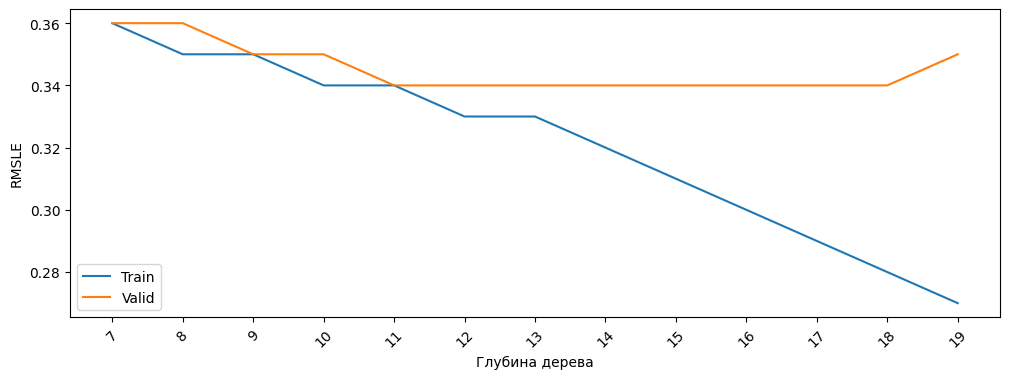

In [ ]:
# ваш код здесь

#Создаем список от 7 до 20
max_depths = range(7, 20)
#Создаем пустые списки, в которые будем добавлять результаты
train_scores = []
valid_scores = []
for depths in max_depths:

  dt = tree.DecisionTreeRegressor(max_depth=depths, random_state=42)
  #Обучаем дерево
  dt.fit(X_train_mm, y_train_log)
  #Выводим значения метрики
  y_train_pred_dt = dt.predict(X_train_mm)
  train_scores.append(round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_dt)), 2))
  y_valid_pred_dt = dt.predict(X_valid_mm)
  valid_scores.append(round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_dt)), 2))

#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(max_depths, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(max_depths, valid_scores, label='Valid') #линейный график для валидационной выборки
ax.set_xlabel('Глубина дерева') #название оси абсцисс
ax.set_ylabel('RMSLE') #название оси ординат
ax.set_xticks(max_depths) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

In [ ]:
dt = tree.DecisionTreeRegressor(max_depth=12, random_state=42)
  #Обучаем дерево
dt.fit(X_train_mm, y_train_log)
  #Выводим значения метрики
y_train_pred_dt = dt.predict(X_train_mm)
print('RMSLE score dt: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_dt)), 2))
y_valid_pred_dt = dt.predict(X_valid_mm)
print('RMSLE score valid dt: ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_dt)), 2))

RMSLE score dt:  0.33
RMSLE score valid dt:  0.34


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
#Создаем объект класса случайный лес
rf = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
    n_jobs=2
)

#Обучаем модель
rf.fit(X_train_mm, y_train_log)
#Выводим значения метрики
y_train_pred_dt = rf.predict(X_train_mm)
print('RMSLE score dt: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_dt)), 2))
y_valid_pred_dt = rf.predict(X_valid_mm)
print('RMSLE score valid dt: ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_dt)), 2))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 10.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 42.8min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed: 43.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   23.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   24.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


RMSLE score dt:  0.32


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.4s


RMSLE score valid dt:  0.33


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   11.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   12.1s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
params = {'learning_rate':0.5,
          'n_estimators':100,
          'max_depth':12,
          'min_samples_split':30,
          'random_state':42
          }


### Тренируем
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train_mm, y_train_log)
y_train_pred_gbr = gbr.predict(X_train_mm)
print('RMSLE score gbr: ', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_gbr)), 2))
y_valid_pred_gbr = gbr.predict(X_valid_mm)
print('RMSLE score valid gbr: ', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred_gbr)), 2))

RMSLE score gbr:  0.21
RMSLE score valid gbr:  0.28


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


[8.39444246e-04 1.27787411e-02 1.29092369e-02 1.52176894e-02
 3.13370705e-02 1.17421664e-04 1.38756624e-03 6.41913226e-01
 3.20539824e-02 3.63662638e-03 1.13575277e-02 1.63973972e-02
 8.30794352e-03 1.57682748e-03 2.36598999e-03 5.78610433e-04
 1.30376714e-01 1.97837981e-03 7.72205369e-04 6.75019847e-04
 8.60251168e-04 1.16680466e-03 7.36070554e-03 8.75803363e-03
 3.56749231e-04 4.13401750e-04 8.91272591e-05 4.71855129e-05
 3.07118907e-04 6.33922769e-04 3.38891889e-05 1.71852871e-05
 1.57381579e-03 1.01385748e-05 6.94503298e-05 1.76537286e-04
 3.73762512e-05 3.51261085e-03 2.66848676e-03 2.21287092e-03
 1.91145398e-03 1.65859788e-03 3.08901155e-03 5.59642540e-03
 3.01476830e-03 1.21793283e-03 1.43969683e-03 1.15812677e-03
 1.51434877e-03 1.43565062e-03 1.13023524e-03 1.65171256e-03
 2.11079990e-03 1.57187695e-03 1.53983898e-03 1.14114450e-03
 1.23930023e-03 2.32275894e-03 2.57475402e-03 2.55375977e-03
 2.94011859e-03 2.05395888e-04 9.90097550e-05]


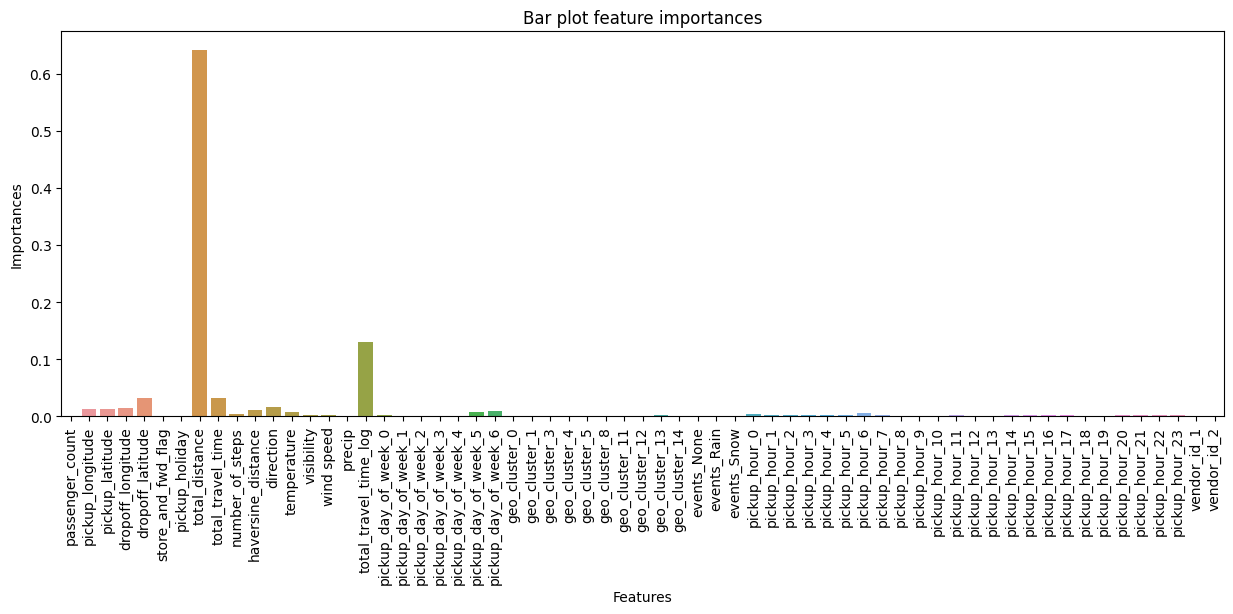

In [ ]:
# ваш код здесь
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
print(gbr.feature_importances_)

fig, ax = plt.subplots(figsize=(15, 5)) #фигура + координатная плоскость
feature = X_train_mm_df.columns #признаки
feature_importances = gbr.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);

plt.xticks(rotation=90)
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
# ваш код здесь
y_train = np.exp(y_train_log) - 1
y_tr_pred_gbr = np.exp(y_train_pred_gbr) - 1
y_valid = np.exp(y_valid_log) - 1
y_val_pred_gbr = np.exp(y_valid_pred_gbr) - 1

from sklearn.metrics import median_absolute_error
print('MeAE score gbr: ', round(median_absolute_error(y_train, y_tr_pred_gbr)/60, 2))
print('MeAE score valid gbr: ', round(median_absolute_error(y_valid, y_val_pred_gbr)/60, 2))

MeAE score gbr:  1.35
MeAE score valid gbr:  1.79


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("/content/drive/My Drive/project5/Project5_test_data.csv")
osrm_data_test = pd.read_csv("/content/drive/My Drive/project5/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
best_features #= col_names

array(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction',
       'temperature', 'visibility', 'wind speed', 'precip',
       'total_travel_time_log', 'pickup_day_of_week_0',
       'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4',
       'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_0',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_4', 'geo_cluster_5',
       'geo_cluster_8', 'geo_cluster_11', 'geo_cluster_12',
       'geo_cluster_13', 'geo_cluster_14', 'events_None', 'events_Rain',
       'events_Snow', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pi

In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
#test_data = add_cluster_features(test_data, kmeans)
coords_test = np.hstack((test_data[['pickup_latitude', 'pickup_longitude']],
                    test_data[['dropoff_latitude', 'dropoff_longitude']]))
test_data['geo_cluster'] = kmeans.predict(coords_test)

test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

#test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

#test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
#column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
#test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)
#test_data = pd.concat([test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], axis=1)

test_data = pd.get_dummies(test_data, columns=['pickup_day_of_week', 'geo_cluster', 'events', 'pickup_hour', 'vendor_id'])

test_data['total_travel_time_log'] = np.log(test_data['total_travel_time']+1)

X_test = test_data[best_features]
X_test_scaled = mm_scaler_fit.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

<ipython-input-9-530a996c72ac>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['pickup_holiday'].iloc[i] = 1


Shape of data: (625134, 63)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
y_test_pred_gbr = gbr.predict(X_test_scaled)
y_test_predict = np.exp(y_test_pred_gbr) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/content/drive/My Drive/project5/submission14_gbr.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
best_features = X_train.columns
dtrain = xgb.DMatrix(X_train_mm, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_mm, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 12, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror',
            'alpha' : 0.1, 'lambda' : 10
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=1000, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.44400	valid-rmse:5.44611
[10]	train-rmse:1.92747	valid-rmse:1.92931
[20]	train-rmse:0.73763	valid-rmse:0.73950
[30]	train-rmse:0.38180	valid-rmse:0.38521
[40]	train-rmse:0.29936	valid-rmse:0.30520
[50]	train-rmse:0.28059	valid-rmse:0.28824
[60]	train-rmse:0.27232	valid-rmse:0.28179
[70]	train-rmse:0.26719	valid-rmse:0.27816
[80]	train-rmse:0.26385	valid-rmse:0.27610
[90]	train-rmse:0.26038	valid-rmse:0.27408
[100]	train-rmse:0.25795	valid-rmse:0.27263
[110]	train-rmse:0.25565	valid-rmse:0.27148
[120]	train-rmse:0.25314	valid-rmse:0.27037
[130]	train-rmse:0.25106	valid-rmse:0.26944
[140]	train-rmse:0.24938	valid-rmse:0.26877
[150]	train-rmse:0.24767	valid-rmse:0.26809
[160]	train-rmse:0.24597	valid-rmse:0.26747
[170]	train-rmse:0.24483	valid-rmse:0.26707
[180]	train-rmse:0.24345	valid-rmse:0.26658
[190]	train-rmse:0.24216	valid-rmse:0.26612
[200]	train-rmse:0.24091	valid-rmse:0.26581
[210]	train-rmse:0.23959	valid-rmse:0.26555
[220]	train-rmse:0.23846	valid-rmse:0.26523

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.26087


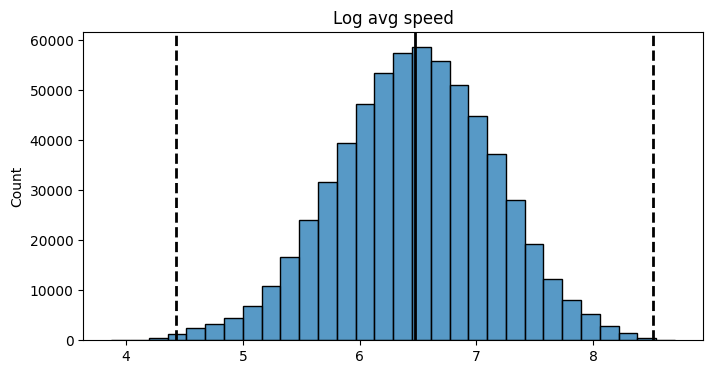

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_avg_speed = np.log(y_test_predict + 1)
histplot = sns.histplot(log_avg_speed, bins=30, ax=ax)
histplot.axvline(log_avg_speed.mean(), color='k', lw=2)
histplot.axvline(log_avg_speed.mean()+ 3 * log_avg_speed.std(), color='k', ls='--', lw=2)
histplot.axvline(log_avg_speed.mean()- 3 * log_avg_speed.std(), color='k', ls='--', lw=2)
histplot.set_title('Log avg speed');

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

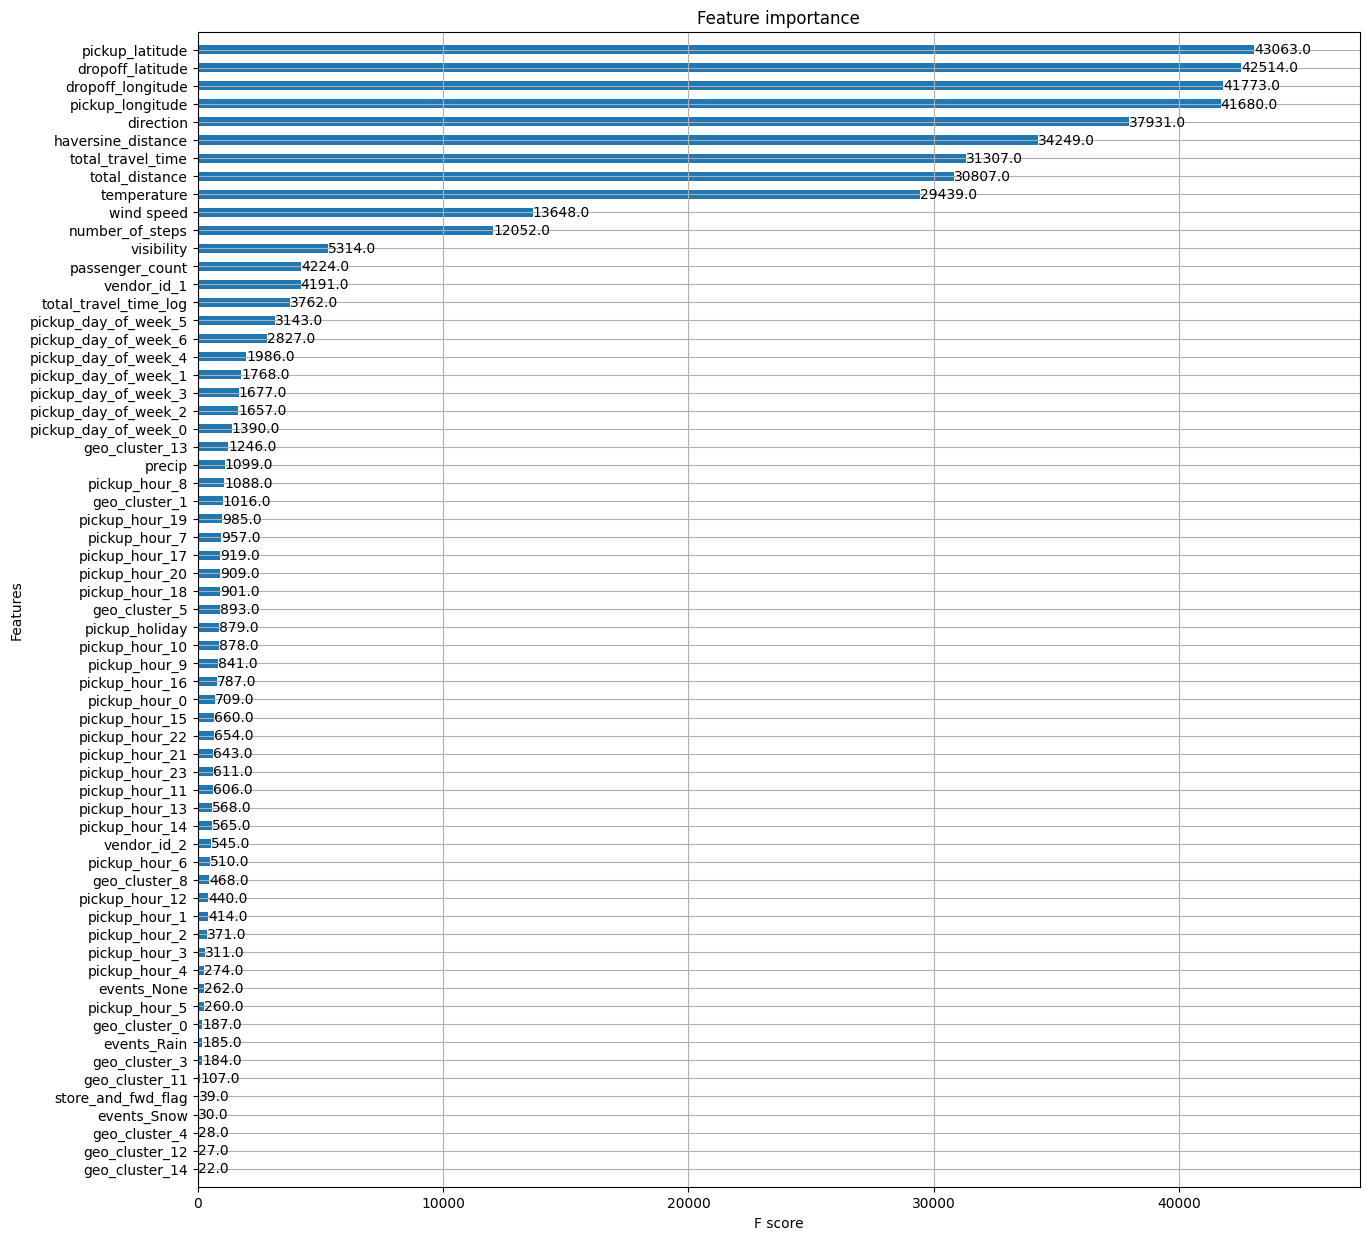

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

In [ ]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/content/drive/My Drive/project5/submission14_xgb.csv', index=False)